CRIME DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from random import sample
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from random import randint

READ DATA

In [2]:
Data = pd.read_csv('drive/MyDrive/ML2022/sensor_readings_24.csv')
D=Data.to_numpy()
dim=np.shape(D)
print(dim)
DF=np.copy(D)

(5456, 25)


In [3]:
counter=0
for i in range(dim[0]):
  if D[i,dim[1]-1] == 'Slight-Right-Turn' or D[i,dim[1]-1] == 'Slight-Left-Turn':
    DF=np.delete(DF,(counter), axis=0)
    counter=counter-1
  counter=counter+1
DF = np.where(DF == 'Move-Forward' , -1, DF)
DF = np.where(DF == 'Sharp-Right-Turn', 1, DF)

EDA

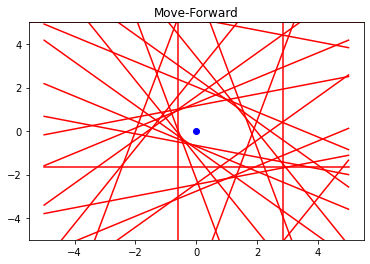

In [17]:
xp=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ang=np.array([270,-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90 , 105, 120, 135, 150, 165, 180 , 195, 210 , 225, 240, 255])
m=np.copy(ang)
m=m.astype('float')
q=np.copy(ang)
q=q.astype('float')
ang=ang*math.pi/180
fig, ax = plt.subplots()
found=0
i=0
while found==0:
  i=randint(0, np.shape(DF)[0])
  if DF[i,24] == -1:
    found=1
    for j in range(len(ang)):
      if ang[j]==0.0:
        plt.axvline(x=DF[i,j],color='r')
      elif ang[j]==(-math.pi): 
        plt.axvline(x=-DF[i,j],color='r')
      elif ang[j]==(math.pi/2):
        plt.axhline(y=DF[i,j], color='r')
      elif  ang[j]==(-math.pi/2):
        plt.axhline(y=-DF[i,j], color='r')
      else :
        m[j]=-1/math.tan(ang[j])
        q[j]=math.sin(ang[j])*DF[i,j]-m[j]*math.cos(ang[j])*DF[i,j]
        plt.plot(xp,xp*m[j]+q[j],'r')
    plt.plot(0,0,'bo')
    plt.ylim(-5,5)
    ax.set_title('Move-Forward')
  

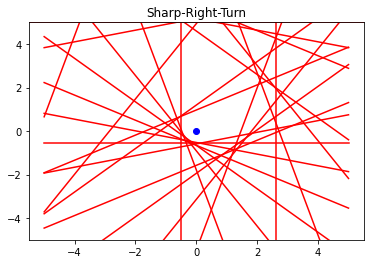

In [18]:
xp=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ang=np.array([270,-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90 , 105, 120, 135, 150, 165, 180 , 195, 210 , 225, 240, 255])
m=np.copy(ang)
m=m.astype('float')
q=np.copy(ang)
q=q.astype('float')
ang=ang*math.pi/180
fig, ax = plt.subplots()
found=0
i=0
while found==0:
  if DF[i,24] == 1:
    i=randint(0, np.shape(DF)[0])
    found=1
    for j in range(len(ang)):
      if ang[j]==0.0:
        plt.axvline(x=DF[i,j],color='r')
      elif ang[j]==(-math.pi): 
        plt.axvline(x=-DF[i,j],color='r')
      elif ang[j]==(math.pi/2):
        plt.axhline(y=DF[i,j], color='r')
      elif  ang[j]==(-math.pi/2):
        plt.axhline(y=-DF[i,j], color='r')
      else :
        m[j]=-1/math.tan(ang[j])
        q[j]=math.sin(ang[j])*DF[i,j]-m[j]*math.cos(ang[j])*DF[i,j]
        plt.plot(xp,xp*m[j]+q[j],'r')
    plt.plot(0,0,'bo')
    plt.ylim(-5,5)
    ax.set_title('Sharp-Right-Turn')
  

In [20]:
dim=np.shape(DF)
print(dim)
il=round(0.40*dim[0])
i=np.random.permutation(dim[0])
X=DF[i[0:il],0:dim[1]-1]
Y=DF[i[0:il],dim[1]-1]
Y=Y.astype('int')
XT=DF[i[il+1:dim[0]],0:dim[1]-1]
YT=DF[i[il+1:dim[0]],dim[1]-1]
YT=YT.astype('int')
print(np.shape(X))

(4302, 25)
(1721, 24)


NORMALIZE DATA

In [15]:
scalerX = preprocessing.MinMaxScaler()
X = scalerX.fit_transform(X)
XT = scalerX.transform(XT)

MODEL SELECTION (HYPERPARAMETER TUNING)

In [ ]:
grid = {'C':        np.logspace(-4,3,5),
        'kernel':   ['rbf'],
        'gamma':    np.logspace(-4,3,5)}
MS = GridSearchCV(estimator = SVC(),
                  param_grid = grid,
                  scoring = 'balanced_accuracy',
                  cv = 10,
                  verbose = 0)
H = MS.fit(X,Y)

TRAIN MODEL- SVC

In [ ]:
M = SVC(C = H.best_params_['C'],
        kernel = H.best_params_['kernel'],
        gamma = H.best_params_['gamma'])
M.fit(X,Y)

SVC(C=17.78279410038923, gamma=0.31622776601683794)

TEST SET - svc


In [ ]:
YF = M.predict(XT)
confusion_matrix(YT,YF)

array([[311,  11],
       [ 14, 308]])

TRAIN MODEL - Tree Classifier

In [21]:
maxDepth=3
grid = {'min_samples_leaf': [8,16,32,64,96,128]}
MS = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = grid,
                  scoring = 'neg_mean_absolute_error',
                  cv = 10,
                  verbose = 0)
H = MS.fit(X,Y)
M = DecisionTreeClassifier(min_samples_leaf=H.best_params_['min_samples_leaf'],
                           max_depth=maxDepth)
M.fit(X,Y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)

In [22]:
text_representation = tree.export_text(M)
print(text_representation)

|--- feature_14 <= 0.90
|   |--- class: 1
|--- feature_14 >  0.90
|   |--- feature_11 <= 0.90
|   |   |--- feature_11 <= 0.90
|   |   |   |--- class: 1
|   |   |--- feature_11 >  0.90
|   |   |   |--- class: 1
|   |--- feature_11 >  0.90
|   |   |--- feature_13 <= 0.90
|   |   |   |--- class: 1
|   |   |--- feature_13 >  0.90
|   |   |   |--- class: -1



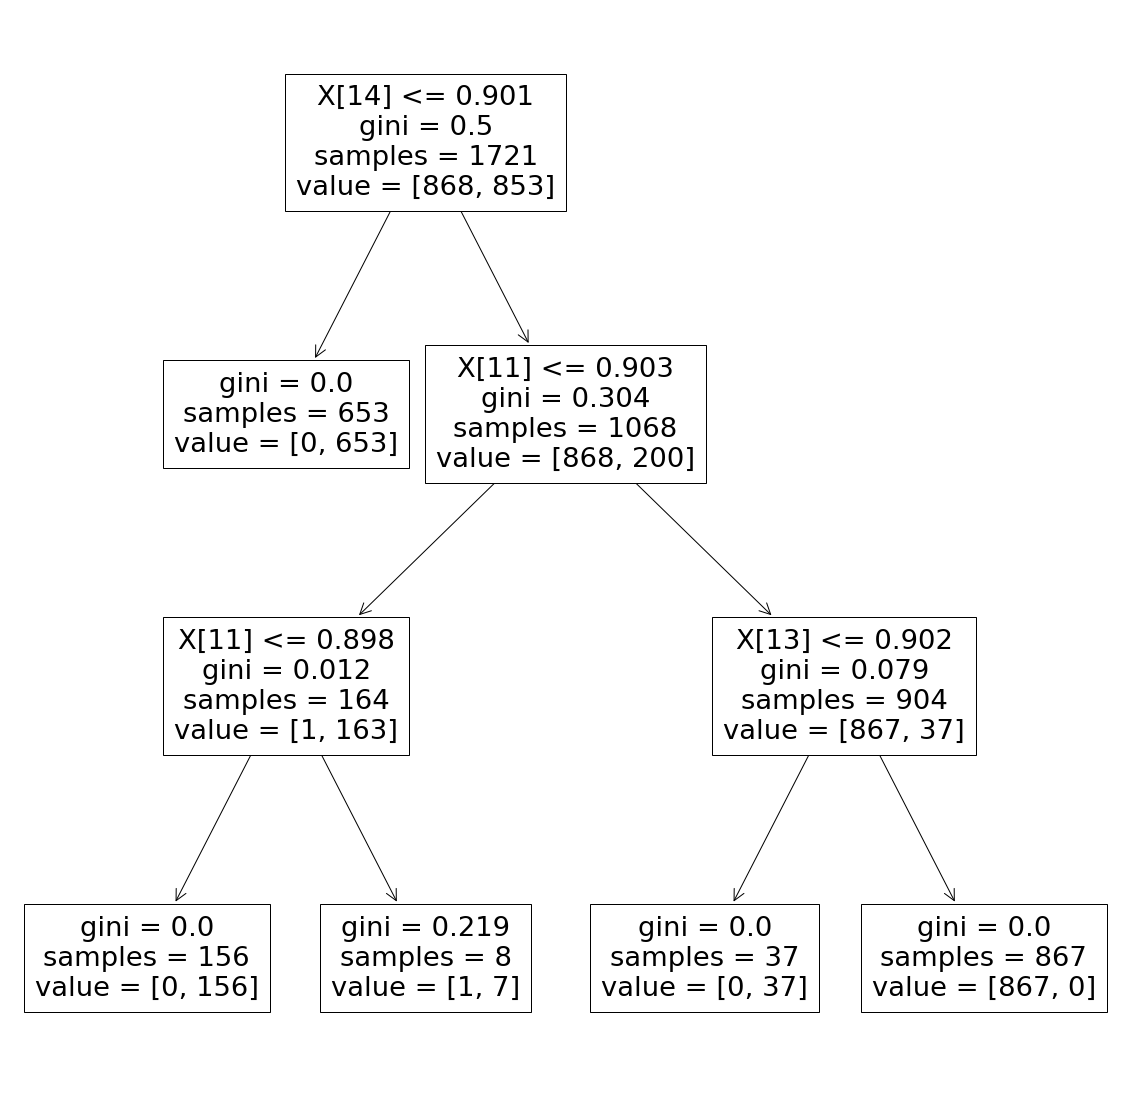

In [23]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(M)

TEST MODEL - RANDOM FOREST

In [24]:
YF = M.predict(XT)
confusion_matrix(YT,YF)

array([[1336,    1],
       [   9, 1234]])